<a href="https://colab.research.google.com/github/Darkdew/DiabetesPrediction_XGBoost_HPtuned/blob/master/PredictingDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
#Importing dataset
df= pd.read_csv("/content/drive/My Drive/Colab Notebooks/DiabetesPrediction_Kaggle_PIMA/PIMA_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.shape

(768, 9)

In [57]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
df.isnull().values.any()

False

In [60]:
#Checking out the correlation between features
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


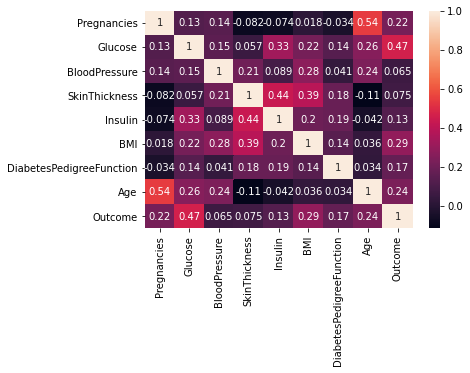

In [61]:
#visualizing the correlation matrix
import seaborn as sns

correlationmatrix= df.corr()
top_correlated_features= correlationmatrix.index


sns.heatmap(df[top_correlated_features].corr(), annot= True)



In [62]:
#If in case your label column is alphabetically presented- we can convert it to boolean form and vice-versa
diabetes_outcome_map= {True:1, False:0}
df['Outcome']= df['Outcome'].map(diabetes_outcome_map)
df.head()
# We wont be running this snippet

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
#checking if our datset is imbalanced
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [64]:
#Alternatively
diabetes_yes_count= len(df.loc[df['Outcome']==1])
diabetes_no_count= len(df.loc[df['Outcome']==0])
print(diabetes_yes_count, diabetes_no_count)

268 500


In [65]:
#Splitting our datset
from sklearn.model_selection import train_test_split
X= df.iloc[:, 0:8]
y=df.iloc[:,8]
print(X.head())
print(y.head())

   Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0            6      148             72  ...  33.6                     0.627   50
1            1       85             66  ...  26.6                     0.351   31
2            8      183             64  ...  23.3                     0.672   32
3            1       89             66  ...  28.1                     0.167   21
4            0      137             40  ...  43.1                     2.288   33

[5 rows x 8 columns]
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [0]:
#Alternatively the splitting could have been done as:
#feature_cols= [	'Pregnancies'	'Glucose'	'BloodPressure'	'SkinThickness'	'Insulin'	'BMI'	'DiabetesPedigreeFunction'	'Age']
#label_cols=['Outcome']

#X= df[feature_cols].values
#y= df[label_cols].values
# We wont be running this snippet as we have already splitted our feature and label column above

In [67]:
#Handling the meaningless '0'values in our features which ruin the overall data instance

#Lets first check-out number of such values
print("total number of rows = {0}".format(len(df)))
print("total number of rows having 0 in Pregnancies column= {}".format(len(df.loc[df['Pregnancies']==0])))
print("total number of rows having 0 in Glucose column= {}".format(len(df.loc[df['Glucose']==0])))
print("total number of rows having 0 in BloodPressure column = {}".format(len(df.loc[df['BloodPressure']==0])))
print("total number of rows having 0 in SkinThickness column = {}".format(len(df.loc[df['SkinThickness']==0])))
print("total number of rows having 0 in Insulin column = {}".format(len(df.loc[df['Insulin']==0])))
print("total number of rows having 0 in BMI column = {}".format(len(df.loc[df['BMI']==0])))
print("total number of rows having 0 in DiabetesPedigreeFunction column = {}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("total number of rows having 0 in Age column = {}".format(len(df.loc[df['Age']==0])))

total number of rows = 768
total number of rows having 0 in Pregnancies column= 111
total number of rows having 0 in Glucose column= 5
total number of rows having 0 in BloodPressure column = 35
total number of rows having 0 in SkinThickness column = 227
total number of rows having 0 in Insulin column = 374
total number of rows having 0 in BMI column = 11
total number of rows having 0 in DiabetesPedigreeFunction column = 0
total number of rows having 0 in Age column = 0


In [0]:
from sklearn.impute import SimpleImputer

In [0]:
imputer_obj= SimpleImputer(missing_values=0, strategy= "mean")
X = imputer_obj.fit_transform(X)

In [0]:
#Now lets split our data in train and test set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=42)

In [71]:
#Applying Random Forest

from sklearn.ensemble import RandomForestClassifier
random_forest_model= RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [72]:
predictions= random_forest_model.predict(X_test)
from sklearn import metrics
print("Accuracy= {0: .3f}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy=  0.753


In [0]:
#Lets try XGBoost with Hyperparameter Tuning

In [0]:
#Hyperparameter Tuning using RandomizedSearchCV

params= {
    "learning_rate"     : [0.05, 0.1, 0.10, 0.15, 0.2, 0.25, 0.3],
    "max_depth"         : [3,4,6,7,8,10, 12,15],
    "min_child_weight"  : [1,3,5,7],
    "gamma"             : [0.0,0.1, 0.2, 0.3, 0.4, 0.5],
    "colsample_bytree"  : [0.3,0.4, 0.5, 0.6, 0.7]
}

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import xgboost

In [0]:
classifier= xgboost.XGBClassifier()

In [0]:
random_search= RandomizedSearchCV(classifier, 
                                  param_distributions=params, 
                                  n_iter=10, 
                                  scoring='roc_auc', 
                                  n_jobs=-1, 
                                  cv=5,
                                  verbose=3)

In [0]:
#Lets define a time function to check on time-lapse
def timer(start_time= None):
  if not start_time:
    start_time= datetime.now()
    return start_time

  elif start_time: 
    thour, temp_sec= divmod((datetime.now()- start_time).total_seconds(),3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds' %(thour, tmin, round(tsec, 2)))

#The divmod() method takes two parameters x and y, where x is treated as numerator and y 
#is treated as denominator.The method calculates both x / y and x % y and returns both the values
#(q, x % y), where q is the whole part of the quotient.


In [79]:
from datetime import datetime

start_time= timer(None)
random_search.fit(X_train,y_train)
timer(start_time)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time taken: 0 hours 0 minutes and 1.56 seconds


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


In [80]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
final_classifier= xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [0]:
final_classifier.fit(X_train, y_train)

y_pred= final_classifier.predict(X_test)


In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(y_test, y_pred)
score= accuracy_score(y_test, y_pred)

print(cm)
print(score)

[[124  27]
 [ 27  53]]
0.7662337662337663


In [0]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(final_classifier, X_train, y_train, cv=10)

In [84]:
score

array([0.7962963 , 0.75925926, 0.74074074, 0.74074074, 0.75925926,
       0.83333333, 0.7037037 , 0.71698113, 0.77358491, 0.83018868])

In [85]:
score.mean()

0.7654088050314465